In [1]:
import os, random, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from pathlib import Path
import json, re, textwrap
from PIL import Image
import colorsys
sns.set_theme(style="whitegrid")
warnings.filterwarnings("ignore")
import statsmodels.api as sm
#comment

In [2]:
df = pd.read_csv('HouseTS.csv', parse_dates=["date"])
df.head(5)

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,...,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
0,2012-03-31,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Alpharetta
1,2012-04-30,61870.0,245000.0,40.723982,130.528256,22.0,29.0,56.0,69.0,89.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202421.064584,Atlanta-Sandy Springs-Alpharetta
2,2012-05-31,125500.0,217450.0,63.913043,119.919216,24.0,40.0,63.0,60.0,144.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202681.309539,Atlanta-Sandy Springs-Alpharetta
3,2012-06-30,153000.0,189900.0,81.598080,105.617353,34.0,46.0,50.0,57.0,126.0,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202998.603897,Atlanta-Sandy Springs-Alpharetta
4,2012-07-31,165500.0,154000.0,81.598080,83.921175,39.0,49.0,42.0,50.0,80.0,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,203781.903446,Atlanta-Sandy Springs-Alpharetta


In [3]:
display(df.info())
display(df.describe().T)
cat_cols = df.select_dtypes("object").nunique().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884092 entries, 0 to 884091
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          884092 non-null  datetime64[ns]
 1   median_sale_price             884092 non-null  float64       
 2   median_list_price             884092 non-null  float64       
 3   median_ppsf                   884092 non-null  float64       
 4   median_list_ppsf              884092 non-null  float64       
 5   homes_sold                    884092 non-null  float64       
 6   pending_sales                 884092 non-null  float64       
 7   new_listings                  884092 non-null  float64       
 8   inventory                     884092 non-null  float64       
 9   median_dom                    884092 non-null  float64       
 10  avg_sale_to_list              884092 non-null  float64       
 11  sold_above_li

None

,count,mean,min,25%,50%,75%,max,std
date,884092,2018-02-13 19:56:37.183098112,2012-03-31 00:00:00,2015-02-28 00:00:00,2018-02-14 00:00:00,2021-01-31 00:00:00,2023-12-31 00:00:00,NaN
median_sale_price,884092.0,394102.625778,0.0,185000.0,302500.0,480000.0,20500000.0,381548.138114
median_list_price,884092.0,422984.881392,0.0,199000.0,320000.0,499900.0,999999999.0,1899201.110845
median_ppsf,884092.0,223.068328,0.0,110.639667,166.093929,260.62628,366700.0,696.724208
median_list_ppsf,884092.0,231.169836,0.0,116.818175,173.142587,270.181473,143015.398551,290.12021
homes_sold,884092.0,76.722786,0.0,19.0,55.0,111.0,955.0,76.698331
pending_sales,884092.0,81.471457,0.0,17.0,57.0,119.0,1374.0,85.327617
new_listings,884092.0,92.910352,0.0,24.0,67.0,133.0,1112.0,92.695852
inventory,884092.0,77.300772,0.0,20.0,50.0,103.0,1941.0,89.041772
median_dom,884092.0,61.289875,0.0,26.0,45.0,74.0,7777.0,82.220497


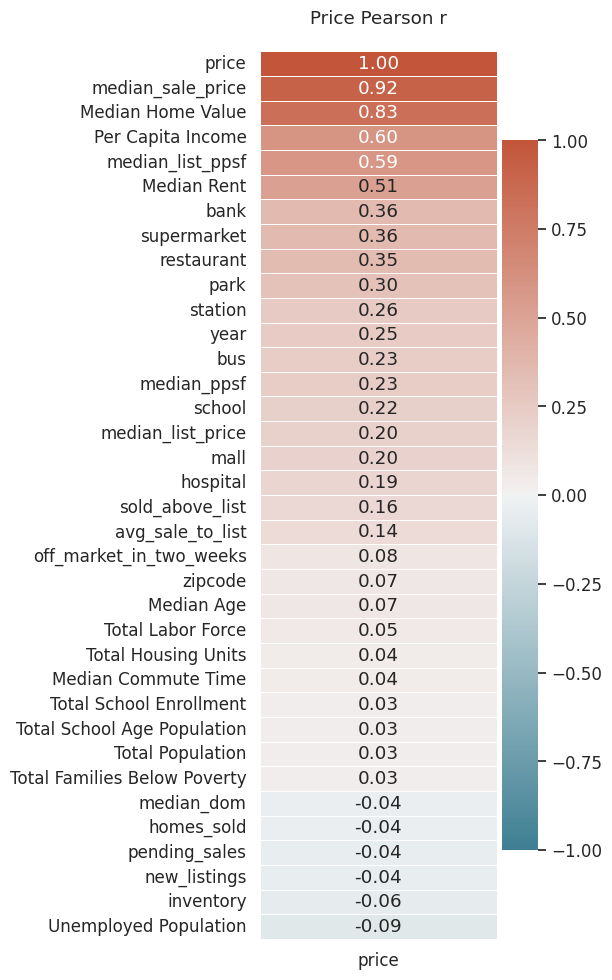

In [4]:
# Compute correlations with price
num_cols = df.select_dtypes("number").columns
corr_vec  = df[num_cols].corr(method="pearson")["price"].sort_values(ascending=False)
sns.set_theme(style="white")
sns.set(font_scale=1.1)
plt.figure(figsize=(6,10))
ax = sns.heatmap(
        corr_vec.to_frame(),
        annot=True, fmt=".2f",
        vmin=-1, vmax=1,
        cmap=sns.diverging_palette(220, 20, as_cmap=True),
        center=0,
        linewidths=.5, linecolor="white",
        cbar_kws={"shrink":0.8, "pad":0.02}
     )
ax.set_title("Price Pearson r", pad=20)
ax.set_ylabel("")
ax.set_xlabel("")
plt.tight_layout()
plt.show()

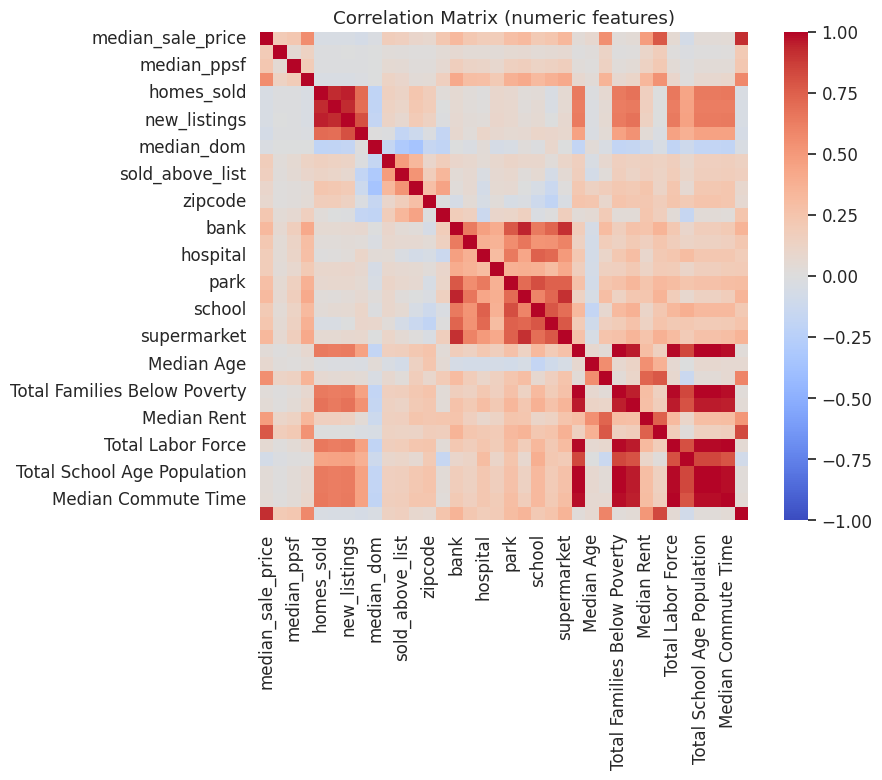

In [5]:
# Compute correlations with all numeric features
num_cols = df.select_dtypes(include="number").columns
corr_mat = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_mat,
    cmap="coolwarm",
    center=0,
    vmax=1, vmin=-1,
    annot=False,
    square=True,
)
plt.title("Correlation Matrix (numeric features)")
plt.tight_layout()
plt.show()

In [6]:
from patsy import dmatrices, dmatrix, dmatrices, ModelDesc, Term, EvalFactor
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Clean up the names for formula use
def safe_col(col):
    return f'Q("{col}")' if ' ' in col or '-' in col else col

features = [
    'median_ppsf', 'homes_sold', 'new_listings', 'median_dom', 'sold_above_list',
    'bank', 'hospital', 'park', 'school', 'supermarket', 'Median Age',
    'Total Families Below Poverty', 'Median Rent', 'Total Labor Force',
    'Total School Age Population', 'Median Commute Time'
]
target = 'median_sale_price'

# Prepare data
df_model = df[features + [target]]
train_data, test_data = train_test_split(df_model, test_size=0.2, random_state=42)

# Use safe_col for formula creation
safe_features = [safe_col(f) for f in features]
formula = f'{safe_col(target)} ~ ' + ' + '.join(safe_features)

# Fit model
model = smf.ols(formula=formula, data=train_data).fit()

# Predict
y_pred = model.predict(test_data)

# R²
r2 = r2_score(test_data[target], y_pred)
print(f'R-squared on test set: {r2:.4f}')
print(model.summary())


R-squared on test set: 0.3336
                            OLS Regression Results                            
Dep. Variable:      median_sale_price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                 2.604e+04
Date:                Thu, 12 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:22:16   Log-Likelihood:            -9.9243e+06
No. Observations:              707273   AIC:                         1.985e+07
Df Residuals:                  707256   BIC:                         1.985e+07
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

The test is done, now we go to the xgboost

In [7]:
df = pd.read_csv('HouseTS.csv')
df.head(5)

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,...,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
0,2012-03-31,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Alpharetta
1,2012-04-30,61870.0,245000.0,40.723982,130.528256,22.0,29.0,56.0,69.0,89.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202421.064584,Atlanta-Sandy Springs-Alpharetta
2,2012-05-31,125500.0,217450.0,63.913043,119.919216,24.0,40.0,63.0,60.0,144.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202681.309539,Atlanta-Sandy Springs-Alpharetta
3,2012-06-30,153000.0,189900.0,81.598080,105.617353,34.0,46.0,50.0,57.0,126.0,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202998.603897,Atlanta-Sandy Springs-Alpharetta
4,2012-07-31,165500.0,154000.0,81.598080,83.921175,39.0,49.0,42.0,50.0,80.0,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,203781.903446,Atlanta-Sandy Springs-Alpharetta


In [8]:
# Make sure it's sorted by city, zipcode, and date
df = df.sort_values(['city', 'zipcode', 'date']).reset_index(drop=True)

# Convert date to datetime if not already
df['date'] = pd.to_datetime(df['date'])

In [9]:
train = df[df.date.dt.year<2023]
#train

In [10]:
test = df[df.date.dt.year>2022]
#test

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809380 entries, 0 to 884079
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          809380 non-null  datetime64[ns]
 1   median_sale_price             809380 non-null  float64       
 2   median_list_price             809380 non-null  float64       
 3   median_ppsf                   809380 non-null  float64       
 4   median_list_ppsf              809380 non-null  float64       
 5   homes_sold                    809380 non-null  float64       
 6   pending_sales                 809380 non-null  float64       
 7   new_listings                  809380 non-null  float64       
 8   inventory                     809380 non-null  float64       
 9   median_dom                    809380 non-null  float64       
 10  avg_sale_to_list              809380 non-null  float64       
 11  sold_above_list   

In [12]:
# Group by city and zipcode for proper time series handling
grouped = train.groupby(['city', 'zipcode'])

In [ ]:
ts_train = pd.DataFrame()

In [ ]:
# Create 3-month profitability target
ts_train['target_profitable_3m'] = (grouped['price'].shift(-3) > 1.005 * train['price']).astype(int)

numeric_column_names = train.select_dtypes(include='number').columns

'''# Exclude 'zipcode' from the lag feature creation
columns_to_lag = [col for col in numeric_column_names if col != 'zipcode']

for feature in columns_to_lag:
    for lag in range(1, 4):  # Lags from 1 to 3 months
        ts_train[f'{feature}_{lag}m'] = grouped[feature].shift(lag)'''


# Loop through all numeric features
for feature in numeric_column_names:
    if feature == 'zipcode':
        # Keep original 'zipcode' without creating lag
        ts_train['zipcode'] = train['zipcode'].values
    else:
        # Create lagged features for all other numeric columns
        for lag in range(1, 4):
            ts_train[f'{feature}_{lag}m'] = grouped[feature].shift(lag)

In [19]:
# Remove rows where target cannot be calculated (last 3 months for each location)
ts_train = ts_train.dropna().reset_index(drop=True)


print("Created features:")
print("- target_profitable_3m")
print("- per_capita_income_lag_1m to per_capita_income_lag_6m")
print("- price_lag_1m to price_lag_6m")
print(f"Final dataset shape: {ts_train.shape}")

Created features:
- target_profitable_3m
- per_capita_income_lag_1m to per_capita_income_lag_6m
- price_lag_1m to price_lag_6m
Final dataset shape: (790702, 107)


In [20]:
ts_train['target_profitable_3m'].value_counts()

target_profitable_3m
1    587370
0    203332
Name: count, dtype: int64

In [21]:
ts_train.columns.values

array(['target_profitable_3m', 'median_sale_price_1m',
       'median_sale_price_2m', 'median_sale_price_3m',
       'median_list_price_1m', 'median_list_price_2m',
       'median_list_price_3m', 'median_ppsf_1m', 'median_ppsf_2m',
       'median_ppsf_3m', 'median_list_ppsf_1m', 'median_list_ppsf_2m',
       'median_list_ppsf_3m', 'homes_sold_1m', 'homes_sold_2m',
       'homes_sold_3m', 'pending_sales_1m', 'pending_sales_2m',
       'pending_sales_3m', 'new_listings_1m', 'new_listings_2m',
       'new_listings_3m', 'inventory_1m', 'inventory_2m', 'inventory_3m',
       'median_dom_1m', 'median_dom_2m', 'median_dom_3m',
       'avg_sale_to_list_1m', 'avg_sale_to_list_2m',
       'avg_sale_to_list_3m', 'sold_above_list_1m', 'sold_above_list_2m',
       'sold_above_list_3m', 'off_market_in_two_weeks_1m',
       'off_market_in_two_weeks_2m', 'off_market_in_two_weeks_3m',
       'zipcode', 'year_1m', 'year_2m', 'year_3m', 'bank_1m', 'bank_2m',
       'bank_3m', 'bus_1m', 'bus_2m', 'bus_3m'

In [22]:
ts_train[ts_train.zipcode==30002]

,target_profitable_3m,median_sale_price_1m,median_sale_price_2m,median_sale_price_3m,median_list_price_1m,median_list_price_2m,median_list_price_3m,median_ppsf_1m,median_ppsf_2m,median_ppsf_3m,...,Total School Age Population_3m,Total School Enrollment_1m,Total School Enrollment_2m,Total School Enrollment_3m,Median Commute Time_1m,Median Commute Time_2m,Median Commute Time_3m,price_1m,price_2m,price_3m
0,1,125500.0,61870.0,46550.0,217450.0,245000.0,217450.0,63.913043,40.723982,31.813674,...,5408.0,5408.0,5408.0,5408.0,2492.0,2492.0,2492.0,202681.309539,202421.064584,200773.999557
1,1,153000.0,125500.0,61870.0,189900.0,217450.0,245000.0,81.598080,63.913043,40.723982,...,5408.0,5408.0,5408.0,5408.0,2492.0,2492.0,2492.0,202998.603897,202681.309539,202421.064584
2,0,165500.0,153000.0,125500.0,154000.0,189900.0,217450.0,81.598080,81.598080,63.913043,...,5408.0,5408.0,5408.0,5408.0,2492.0,2492.0,2492.0,203781.903446,202998.603897,202681.309539
3,0,140250.0,165500.0,153000.0,145000.0,154000.0,189900.0,78.918228,81.598080,81.598080,...,5408.0,5408.0,5408.0,5408.0,2492.0,2492.0,2492.0,205012.252913,203781.903446,202998.603897
4,1,140000.0,140250.0,165500.0,103950.0,145000.0,154000.0,78.918228,78.918228,81.598080,...,5408.0,5408.0,5408.0,5408.0,2492.0,2492.0,2492.0,205414.599202,205012.252913,203781.903446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0,602750.0,555000.0,519000.0,542500.0,540000.0,525000.0,234.281690,230.061350,218.750000,...,5713.0,5713.0,5713.0,5713.0,2728.0,2728.0,2728.0,499412.241077,495606.636012,488436.530983
123,0,568750.0,602750.0,555000.0,455000.0,542500.0,540000.0,232.192450,234.281690,230.061350,...,5713.0,5713.0,5713.0,5713.0,2728.0,2728.0,2728.0,500013.225078,499412.241077,495606.636012
124,0,570000.0,568750.0,602750.0,472642.5,455000.0,542500.0,225.866425,232.192450,234.281690,...,5713.0,5713.0,5713.0,5713.0,2728.0,2728.0,2728.0,498003.211865,500013.225078,499412.241077
125,0,572500.0,570000.0,568750.0,460285.0,472642.5,455000.0,231.490967,225.866425,232.192450,...,5713.0,5713.0,5713.0,5713.0,2728.0,2728.0,2728.0,496887.003144,498003.211865,500013.225078


In [23]:
ts_train

,target_profitable_3m,median_sale_price_1m,median_sale_price_2m,median_sale_price_3m,median_list_price_1m,median_list_price_2m,median_list_price_3m,median_ppsf_1m,median_ppsf_2m,median_ppsf_3m,...,Total School Age Population_3m,Total School Enrollment_1m,Total School Enrollment_2m,Total School Enrollment_3m,Median Commute Time_1m,Median Commute Time_2m,Median Commute Time_3m,price_1m,price_2m,price_3m
0,1,125500.0,61870.0,46550.0,217450.0,245000.0,217450.0,63.913043,40.723982,31.813674,...,5408.0,5408.0,5408.0,5408.0,2492.0,2492.0,2492.0,202681.309539,202421.064584,200773.999557
1,1,153000.0,125500.0,61870.0,189900.0,217450.0,245000.0,81.598080,63.913043,40.723982,...,5408.0,5408.0,5408.0,5408.0,2492.0,2492.0,2492.0,202998.603897,202681.309539,202421.064584
2,0,165500.0,153000.0,125500.0,154000.0,189900.0,217450.0,81.598080,81.598080,63.913043,...,5408.0,5408.0,5408.0,5408.0,2492.0,2492.0,2492.0,203781.903446,202998.603897,202681.309539
3,0,140250.0,165500.0,153000.0,145000.0,154000.0,189900.0,78.918228,81.598080,81.598080,...,5408.0,5408.0,5408.0,5408.0,2492.0,2492.0,2492.0,205012.252913,203781.903446,202998.603897
4,1,140000.0,140250.0,165500.0,103950.0,145000.0,154000.0,78.918228,78.918228,81.598080,...,5408.0,5408.0,5408.0,5408.0,2492.0,2492.0,2492.0,205414.599202,205012.252913,203781.903446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790697,0,438000.0,435000.0,435000.0,445250.0,435000.0,450000.0,298.229399,305.238677,299.755501,...,37698.0,37698.0,37698.0,37698.0,15002.0,15002.0,15002.0,430678.116793,425381.408635,416349.153215
790698,0,435500.0,438000.0,435000.0,429350.0,445250.0,435000.0,293.754998,298.229399,305.238677,...,37698.0,37698.0,37698.0,37698.0,15002.0,15002.0,15002.0,432523.250209,430678.116793,425381.408635
790699,0,430000.0,435500.0,438000.0,449999.5,429350.0,445250.0,293.646556,293.754998,298.229399,...,37698.0,37698.0,37698.0,37698.0,15002.0,15002.0,15002.0,431488.991172,432523.250209,430678.116793
790700,0,442000.0,430000.0,435500.0,435000.0,449999.5,429350.0,294.548415,293.646556,293.754998,...,37698.0,37698.0,37698.0,37698.0,15002.0,15002.0,15002.0,429747.893176,431488.991172,432523.250209


XGboost with my code 

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import xgboost as xgb

import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor


In [31]:
# Load your data, step 1
df = ts_train

# Step 2: Define target and features
target = 'target_profitable_3m'
y = df[target]
X = df.drop(columns=[target])

# Step 3: Check class distribution
print("Class distribution in full dataset:")
print(y.value_counts())

# Step 4: Split with stratification (adjust test_size if needed)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,      # Increased test size to ensure both classes appear
    stratify=y,
    random_state=42
)


Class distribution in full dataset:
target_profitable_3m
1    587370
0    203332
Name: count, dtype: int64


In [32]:
# Step 5: Check class distribution in splits
print("\nClass distribution in train set:")
print(y_train.value_counts())

print("\nClass distribution in test set:")
print(y_test.value_counts())

# Step 6: Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train XGBoost classifier
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)



Class distribution in train set:
target_profitable_3m
1    411159
0    142332
Name: count, dtype: int64

Class distribution in test set:
target_profitable_3m
1    176211
0     61000
Name: count, dtype: int64


In [33]:
xgb_model.fit(X_train_scaled, y_train)

# Step 8: Predict and evaluate
y_pred = xgb_model.predict(X_test_scaled)

# Step 9: Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 33641  27359]
 [  9723 166488]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.55      0.64     61000
           1       0.86      0.94      0.90    176211

    accuracy                           0.84    237211
   macro avg       0.82      0.75      0.77    237211
weighted avg       0.84      0.84      0.83    237211



In [34]:


# Preprocess the data
X_train_processed = X_train_scaled
X_test_processed = X_test_scaled

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [300],
    'learning_rate': [0.05],
    'max_depth': [7],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0.1],
    'reg_alpha': [0],
    'reg_lambda': [10]
}

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=5,  # Increased cross-validation for better robustness
    n_jobs=-1,
    verbose=1
)


In [35]:
# Fit the model
#best_xgb_model= grid_search.fit(X_train_processed, y_train)
xgb_model.fit(X_train_processed, y_train)
# Use the best model from GridSearchCV directly without saving/loading
#best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = xgb_model.predict(X_test_processed)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.36147838830947876


                            Feature  Importance
0                           zipcode       561.0
1                           year_3m       354.0
2                           year_1m       343.0
3                           year_2m       248.0
4                     homes_sold_3m       243.0
..                              ...         ...
101                          bus_2m         5.0
102      Total School Enrollment_3m         3.0
103  Total School Age Population_2m         2.0
104      Total School Enrollment_1m         1.0
105      Total School Enrollment_2m         1.0

[106 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

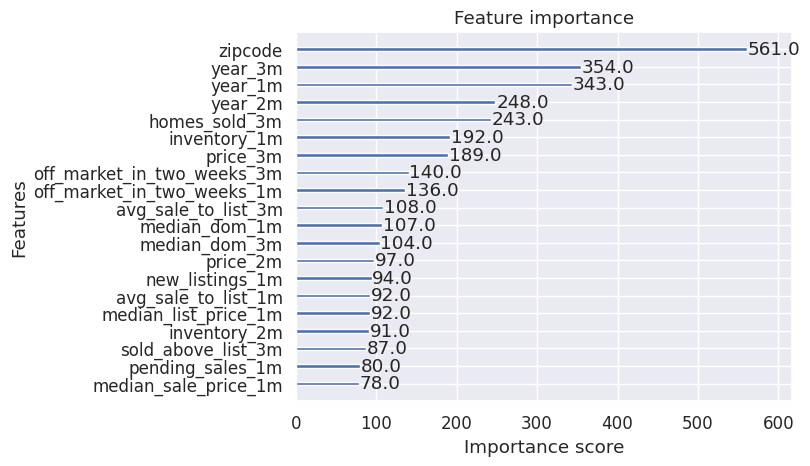

In [37]:
# Extract the Booster object from the XGBRegressor model
booster = xgb_model.get_booster()

# Map feature importance to the feature names (convert to a list)
booster.feature_names = X_train.columns.tolist()  # Ensure it's a list of feature names

# Get the feature importance values
importance_dict = booster.get_score(importance_type='weight')

# Convert the dictionary to a DataFrame for easier handling
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the DataFrame
print(importance_df)

# Now you can export or use the `importance_df` for building charts
# For example, saving it to CSV for use in PowerPoint or other tools
importance_df.to_csv("feature_importance.csv", index=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(booster, max_num_features=20)
plt.show()
